In [1]:
import math
import numpy as np
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nLenslet = 1
n = 401
nPx = n*nLenslet+1
D = 25.5
n_radius = nPx
#onAxis = ceo.Source("R",zenith=0.*math.pi/180/3600,azimuth=0*math.pi/4,
#                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,-25])
src    = ceo.Source("J",zenith=np.array([0])*ceo.constants.ARCMIN2RAD,
                    azimuth=np.array([0])*math.pi/180,
                    rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])
GMT = ceo.GMT_MX(D,nPx)
wfs = ceo.ShackHartmann(1,nPx-1,D,N_PX_IMAGE=nPx)

In [3]:
GMT.propagate(src)

In [4]:
src.zenith

array([ 0.], dtype=float32)

In [5]:
sps = ceo.SegmentPistonSensor(GMT.M1,src)

@(CEO)>Complex_amplitude: I am empty:(!


In [6]:
sps.propagate(src)
#sps.W.phase.shape

<matplotlib.colorbar.Colorbar instance at 0x2b8e49364bd8>

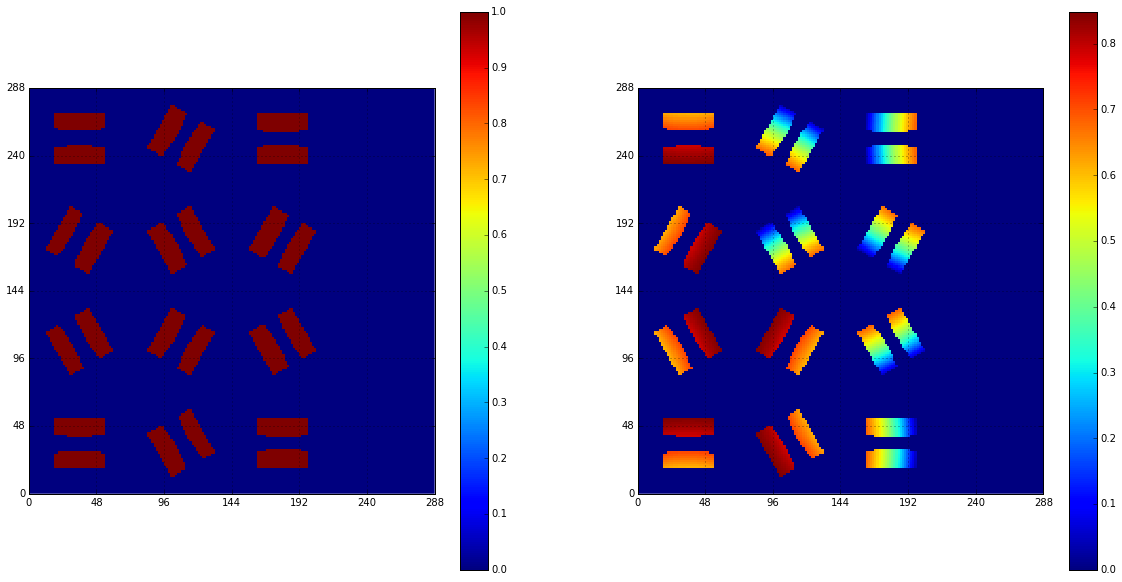

In [7]:
fig, (ax1,ax2) = subplots(ncols=2)
fig.set_size_inches((20,10))
h1 = ax1.imshow(sps.W.amplitude.host(),
               interpolation='None',extent=[0,288,0,288],
               origin='lower')
ax1.set_xticks(np.arange(0,48*7, 48))
ax1.set_yticks(np.arange(0,48*7, 48))
ax1.grid()
colorbar(h1,ax=ax1)
h2 = ax2.imshow(sps.W.phase.host(units='nm'),
               interpolation='None',extent=[0,288,0,288],
               origin='lower')
ax2.set_xticks(np.arange(0,48*7, 48))
ax2.set_yticks(np.arange(0,48*7, 48))
ax2.grid()
colorbar(h2,ax=ax2)

<matplotlib.colorbar.Colorbar instance at 0x2b8e494b8680>

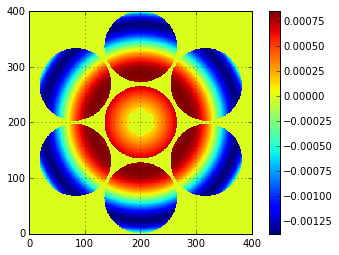

In [8]:
imshow(src.phase.host(units='micron'),interpolation='None',origin='lower')
grid()
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x2b8e496175a8>

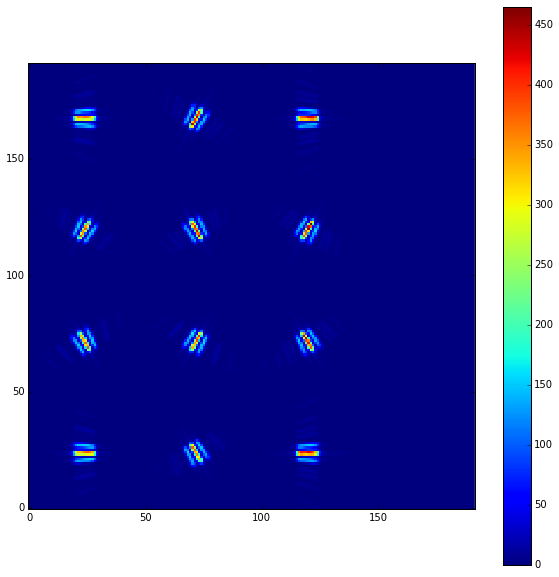

In [9]:
fig, ax1 = subplots()
fig.set_size_inches((10,10))
imshow(sps.camera.frame.host(),interpolation='None',origin='lower')
colorbar()

In [10]:
4*24*1.215/(2*1.215+0.243)

43.63636363636364

In [11]:
2*1.215/83e-3

29.27710843373494

In [12]:
45*34

1530

In [13]:
np.arange(12)/6

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [14]:
k = np.arange(16)%12
print k

[ 0  1  2  3  4  5  6  7  8  9 10 11  0  1  2  3]


In [15]:
k%6 - 0.5*(k/6)

array([ 0. ,  1. ,  2. ,  3. ,  4. ,  5. , -0.5,  0.5,  1.5,  2.5,  3.5,
        4.5,  0. ,  1. ,  2. ,  3. ])

In [16]:
3/((1.085e-6*2/1.5)*ceo.constants.RAD2ARCSEC)

10.053739930842912